In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define 1-year range
end_date = datetime.today().date()
start_date = end_date - timedelta(days=365)

url = f"https://api.frankfurter.app/{start_date}..{end_date}"

response = requests.get(url)
data = response.json()['rates']

# Convert to DataFrame
df = pd.DataFrame(data).T  # Transpose: dates become rows
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Save to CSV
df.to_csv("currency_rates.csv")
print("Currency rates for the past year saved to 'currency_rates.csv'.")

Currency rates for the past year saved to 'currency_rates.csv'.


               AUD     BGN     BRL     CAD     CHF     CNY     CZK     DKK  \
2024-07-26  1.6559  1.9558  6.1170  1.5009  0.9594  7.8750  25.370  7.4626   
2024-07-29  1.6534  1.9558  6.1165  1.4976  0.9578  7.8518  25.371  7.4625   
2024-07-30  1.6560  1.9558  6.0843  1.4996  0.9592  7.8489  25.429  7.4619   
2024-07-31  1.6635  1.9558  6.0874  1.4977  0.9533  7.8194  25.457  7.4621   
2024-08-01  1.6501  1.9558  6.1120  1.4912  0.9467  7.8203  25.454  7.4613   

                GBP     HKD  ...     NZD     PHP     PLN     RON      SEK  \
2024-07-26  0.84378  8.4782  ...  1.8427  63.377  4.2740  4.9718  11.7325   
2024-07-29  0.84345  8.4490  ...  1.8418  63.343  4.2938  4.9725  11.7265   
2024-07-30  0.84260  8.4558  ...  1.8386  63.502  4.2838  4.9766  11.6860   
2024-07-31  0.84380  8.4589  ...  1.8289  63.218  4.2908  4.9749  11.6125   
2024-08-01  0.84328  8.4320  ...  1.8140  62.912  4.2958  4.9756  11.5220   

               SGD     THB     TRY     USD      ZAR  
2024-07-26  1.

<Axes: >

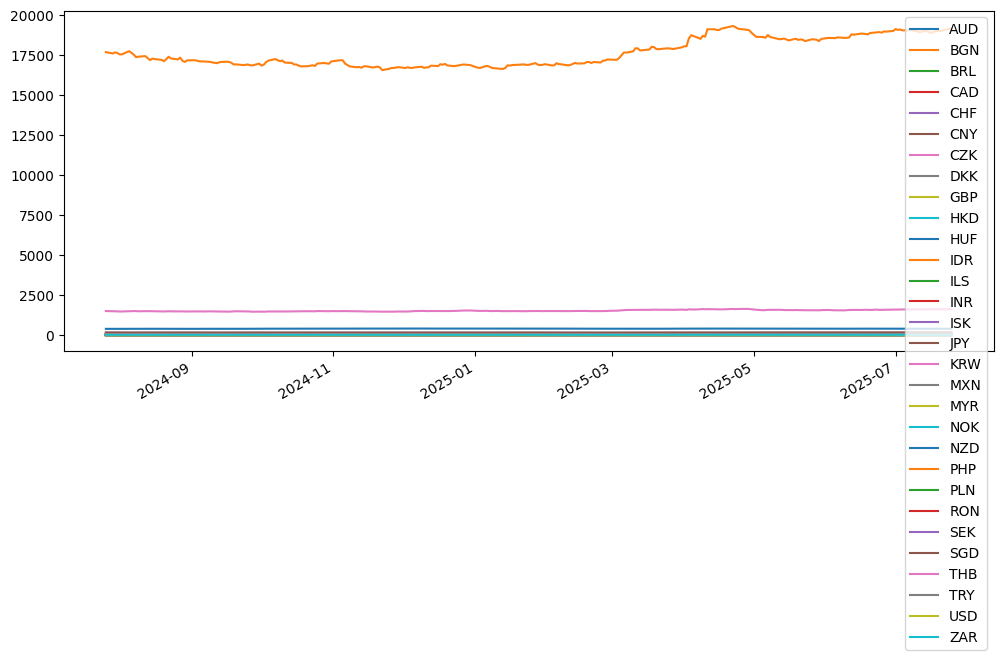

In [2]:
print(df.head())
print(df.describe())
print(df.isna().sum())
df.plot(figsize=(12, 5))  # visualize trends
